In [12]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
import os, sys

# Add to path the parent directory of this notebook dir

sys.path.append(os.path.dirname(os.getcwd()))

import numpy as np


from rl_envs_forge.envs.labyrinth.labyrinth import Labyrinth

from rl_envs_forge.envs.labyrinth.mdp.mdp import LabyrinthMDP


from value_iteration import value_iteration_v, value_iteration_q

from policy_iteration import policy_evaluation_v

from visualize import draw_labyrinth_gridworld

Optimal Policy: {(4, 0): 2, (4, 9): 0, (3, 7): 0, (5, 4): 0, (9, 2): 0, (5, 7): 2, (8, 0): 1, (0, 2): 1, (8, 3): 0, (8, 9): 3, (0, 5): 3, (2, 2): 1, (1, 0): 0, (8, 6): 3, (0, 8): 3, (2, 5): 0, (1, 3): 2, (1, 9): 0, (7, 7): 2, (4, 2): 1, (4, 5): 3, (3, 3): 2, (3, 9): 0, (5, 0): 2, (5, 3): 0, (8, 2): 1, (8, 5): 3, (9, 4): 0, (0, 1): 1, (0, 7): 3, (8, 8): 3, (1, 2): 1, (0, 4): 3, (2, 7): 0, (1, 5): 0, (7, 0): 2, (7, 3): 0, (7, 9): 2, (6, 7): 2, (3, 2): 1, (4, 7): 0, (5, 2): 0, (4, 4): 3, (9, 0): 0, (5, 5): 0, (8, 4): 3, (0, 0): 1, (8, 1): 1, (8, 7): 3, (9, 6): 0, (0, 3): 2, (0, 9): 3, (2, 0): 0, (9, 9): 0, (0, 6): 3, (2, 3): 2, (2, 9): 0, (1, 7): 0, (6, 0): 2, (7, 5): 2, (6, 3): 0, (6, 9): 2}
Value Function: {(4, 0): 3.421652245010003, (4, 9): 2.467284486612293, (3, 7): 3.421652245010003, (5, 4): 8.99, (9, 2): 5.8639490000000025, (5, 7): 3.421652245010003, (8, 0): 5.267554100000003, (0, 2): 6.5266100000000025, (8, 3): 7.262900000000002, (8, 9): 3.812946938900003, (0, 5): 5.863949000000002

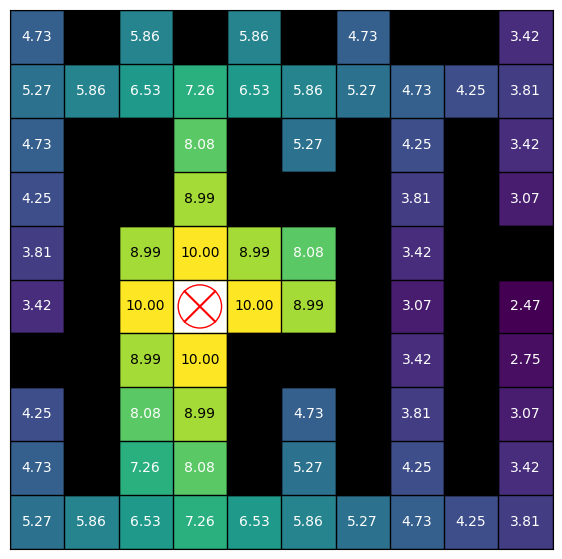

In [14]:
env = Labyrinth(10, 10, seed=0)
mdp = LabyrinthMDP()

t_r_dict, explored_states = mdp.build_mdp(env)
states = list(set([s for s, _ in t_r_dict.keys()]))
actions = list(set([a for _, a in t_r_dict.keys()]))
# len(explored_states)

gamma = 0.9
theta = 1e-6

grid_shape = (env.rows, env.cols)
walls = set([tuple(cell) for cell in list(np.argwhere(env.maze.grid == 0))])

optimal_policy, optimal_value_function = value_iteration_v(t_r_dict, states, actions)

print("Optimal Policy:", optimal_policy)
print("Value Function:", optimal_value_function)

grid_shape = (env.rows, env.cols)
walls = set([tuple(cell) for cell in list(np.argwhere(env.maze.grid == 0))])
draw_labyrinth_gridworld(
    grid_shape,
    walls,
    optimal_value_function,
    env.maze.target_position,
    policy=None,
    enable_heatmap=True,
)

Optimal Policy: {(4, 0): 2, (4, 9): 0, (3, 7): 0, (5, 4): 0, (9, 2): 0, (5, 7): 2, (8, 0): 1, (0, 2): 1, (8, 3): 0, (8, 9): 3, (0, 5): 3, (2, 2): 1, (1, 0): 0, (8, 6): 3, (0, 8): 3, (2, 5): 0, (1, 3): 2, (1, 9): 0, (7, 7): 2, (4, 2): 1, (4, 5): 3, (3, 3): 2, (3, 9): 0, (5, 0): 2, (5, 3): 0, (8, 2): 1, (8, 5): 3, (9, 4): 0, (0, 1): 1, (0, 7): 3, (8, 8): 3, (1, 2): 1, (0, 4): 3, (2, 7): 0, (1, 5): 0, (7, 0): 2, (7, 3): 0, (7, 9): 2, (6, 7): 2, (3, 2): 1, (4, 7): 0, (5, 2): 0, (4, 4): 3, (9, 0): 0, (5, 5): 0, (8, 4): 3, (0, 0): 1, (8, 1): 1, (8, 7): 3, (9, 6): 0, (0, 3): 2, (0, 9): 3, (2, 0): 0, (9, 9): 0, (0, 6): 3, (2, 3): 2, (2, 9): 0, (1, 7): 0, (6, 0): 2, (7, 5): 2, (6, 3): 0, (6, 9): 2}
Value Function: {(4, 0): {0: 2.079487020509003, 1: 2.079487020509003, 2: 3.421652245010003, 3: 2.079487020509003}, (4, 9): {0: 2.467284486612293, 1: 1.2205560379510638, 2: 1.2205560379510638, 3: 1.2205560379510638}, (3, 7): {0: 3.421652245010003, 1: 2.079487020509003, 2: 2.752538318458103, 3: 2.07948

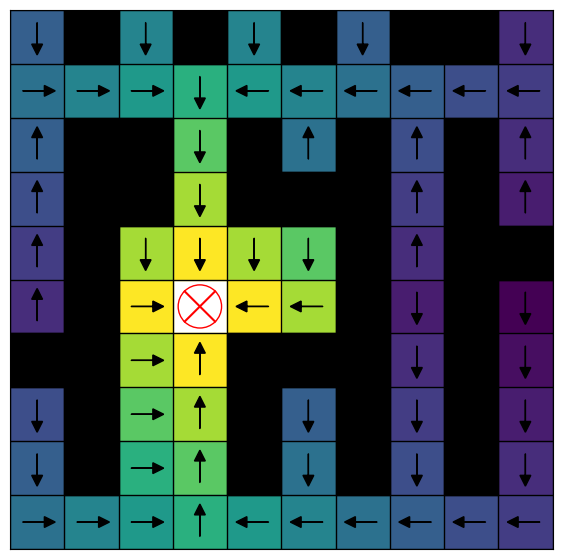

In [15]:
env = Labyrinth(10, 10, seed=0)
mdp = LabyrinthMDP()

t_r_dict, explored_states = mdp.build_mdp(env)
states = list(set([s for s, _ in t_r_dict.keys()]))
actions = list(set([a for _, a in t_r_dict.keys()]))
# len(explored_states)

gamma = 0.9
theta = 1e-6

grid_shape = (env.rows, env.cols)
walls = set([tuple(cell) for cell in list(np.argwhere(env.maze.grid == 0))])

optimal_policy, optimal_value_function = value_iteration_q(t_r_dict, states, actions)

print("Optimal Policy:", optimal_policy)
print("Value Function:", optimal_value_function)

# From Q extract V
states = list(set([s for s, _ in t_r_dict.keys()]))
V = {state: 0 for state in states}
optimal_V = policy_evaluation_v(states, optimal_policy, V, t_r_dict, gamma, theta)
print("Optimal Value Function:", optimal_V)

grid_shape = (env.rows, env.cols)
walls = set([tuple(cell) for cell in list(np.argwhere(env.maze.grid == 0))])
draw_labyrinth_gridworld(
    grid_shape,
    walls,
    optimal_V,
    env.maze.target_position,
    policy=optimal_policy,
    enable_heatmap=True,
)

### Plot each iteration

In [16]:
plot_steps = True
plot_every_k_iterations = 1

states = list(set([s for s, _ in t_r_dict.keys()]))
actions = list(set([a for _, a in t_r_dict.keys()]))

# Initialize value function and policy arbitrarily
Q = {state: {action: 0 for action in actions} for state in states}
policy = {state: np.random.choice(actions) for state in states}

iteration = 0
policy_stable = False
while True:
    delta = 0
    for state in states:
        for action in actions:
            q = Q[state][action]

            # One step lookahead to find the new Q value for the current state-action pair
            next_state, reward, done = t_r_dict.get(
                (state, action), (None, 0, True)
            )
            if next_state is None or done:
                Q[state][action] = reward
            else:
                Q[state][action] = reward + gamma * max(
                    [Q[next_state][a] for a in actions]
                )

            delta = max(delta, abs(q - Q[state][action]))
            
        iteration += 1

    if delta < theta:
        print("Value Iteration completed at iteration: ", iteration)
        break

Value Iteration completed at iteration:  620
